In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Step 1. Load data as a pd DataFrame.

Ideal structure of the dataframe: article, qid, category, description.

In [34]:
df = pd.read_csv('unique_health_articles.csv')

In [35]:
df['text'] = df.apply(lambda row: str(row['article']) + ": " + str(row['description']), axis=1)

In [36]:
df.tail()

,Unnamed: 0.1,Unnamed: 0,article,qid,total_pageviews,description,category,page_size,revisions_since_2024,text
878,878,878,Yoga_as_exercise,Q65091595,4324,physical activity consisting mainly of yoga poses,High-importance,105306.0,106,Yoga_as_exercise: physical activity consisting...
879,879,879,Young_Living,Q18067581,2947,American multi-level marketing company,Low-importance,23704.0,17,Young_Living: American multi-level marketing c...
880,880,880,Zero_emission_zone,Q647266,127,defined area,High-importance,59.0,1,Zero_emission_zone: defined area
881,881,881,Zumba,Q229680,42089,dance fitness program,Mid-importance,22096.0,51,Zumba: dance fitness program
882,882,882,Zyzz,Q2618609,181047,Russian-born Australian bodybuilder and Intern...,Mid-importance,24173.0,41,Zyzz: Russian-born Australian bodybuilder and ...


In [37]:
df = df.rename(columns = {"category": "ground_truth_label"})

In [38]:
df.head()

,Unnamed: 0.1,Unnamed: 0,article,qid,total_pageviews,description,ground_truth_label,page_size,revisions_since_2024,text
0,0,0,1977_NestlÃ©_boycott,Q1498774,27259,boycott,Low-importance,NaN,0,1977_NestlÃ©_boycott: boycott
1,1,1,2007_tuberculosis_scare,Q4609852,550,international health scare,Low-importance,16565.0,13,2007_tuberculosis_scare: international health ...
2,2,2,2011_United_States_listeriosis_outbreak,Q4622783,871,disease outbreak in the United States,Low-importance,23708.0,13,2011_United_States_listeriosis_outbreak: disea...
3,3,3,2014_California_Proposition_46,Q119129906,153,NaN,Low-importance,5373.0,5,2014_California_Proposition_46: nan
4,4,4,24_Hour_Fitness,Q4631849,1122,US fitness center chain,Low-importance,21019.0,53,24_Hour_Fitness: US fitness center chain


Add a column, "sequence", to train the model on this data and its corresponding label/

# Step 2: Train/test splitting.

In [39]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(df['text'], 
                                                    df['ground_truth_label'],
                                                      test_size=0.2,  # 30% set aside for testing
                                                      random_state=42) # ensures consistency

# Step 3: Vectorize data.

In [40]:
vectorizer = TfidfVectorizer(min_df=1, max_df=1.0)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [41]:
vectorizer2 = TfidfVectorizer()
xtest = vectorizer2.fit_transform(X_test)
xtest

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1521 stored elements and shape (177, 880)>

In [42]:
vectorizer.get_feature_names_out()

array(['10', '11', '1881', ..., 'zumba', 'zyzz', 'ã³risdã³ttir'],
      shape=(2439,), dtype=object)

# Step 4: Apply Logistic Regression.

In [47]:
# Step 1: initialize classifier
clf = LogisticRegression()

# Step 2: Fit the model using the training data
clf.fit(X_train_vec, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [48]:
# Step 3: Predict the values on the testing data
preds = clf.predict(X_test_vec)

# Step 4: Show a report of accuracy
print(classification_report(y_test, preds, zero_division=0))

                    precision    recall  f1-score   support

   High-importance       0.75      0.14      0.24        21
    Low-importance       0.59      0.96      0.73        93
    Mid-importance       0.60      0.24      0.34        38
Unknown-importance       0.25      0.08      0.12        25

          accuracy                           0.58       177
         macro avg       0.55      0.35      0.36       177
      weighted avg       0.56      0.58      0.50       177



# Step 5: Draw confusion matrix.

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix_with_percentages(y_true, y_pred, 
                                           labels=[0, 1], 
                                           title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = cm.sum()
    cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100

    annot = [[f"{count}\n{pct:.1f}%" for count, pct in zip(row, row_pct)] 
             for row, row_pct in zip(cm, cm_percent)]

    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=annot, fmt="", cmap="Blues", 
                xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

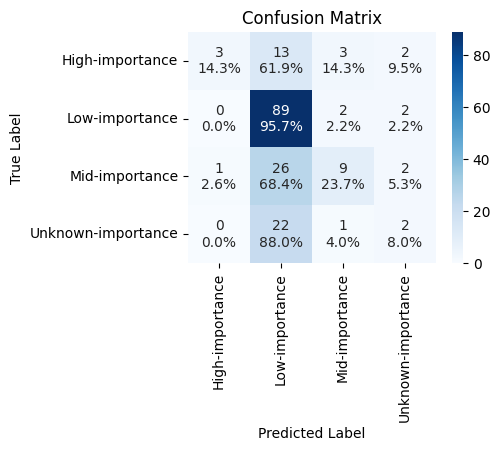

In [50]:
labels = sorted(df['ground_truth_label'].unique())
plot_confusion_matrix_with_percentages(y_test, preds, labels=labels)